In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import re

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
from wordcloud import WordCloud

In [12]:
from collections import Counter

In [13]:
df=pd.read_csv("test (1).csv", encoding="latin1")

In [31]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),density
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,26.0


In [30]:
df['density']=df['Density (P/Km²)']

In [15]:
df.shape

(4815, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [17]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [18]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [19]:
df.describe(include="object")

,textID,text,sentiment,Time of Tweet,Age of User,Country
count,3534,3534,3534,3534,3534,3534
unique,3534,3534,3,3,6,195
top,469e15c5a8,http://twitpic.com/4woj2 - omgssh ang cute n...,neutral,morning,0-20,Afghanistan
freq,1,1,1430,1178,590,20


In [20]:
df.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [21]:
(df.isnull().sum()/ len(df)) * 100

textID              26.604361
text                26.604361
sentiment           26.604361
Time of Tweet       26.604361
Age of User         26.604361
Country             26.604361
Population -2020    26.604361
Land Area (Km²)     26.604361
Density (P/Km²)     26.604361
dtype: float64

In [22]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()


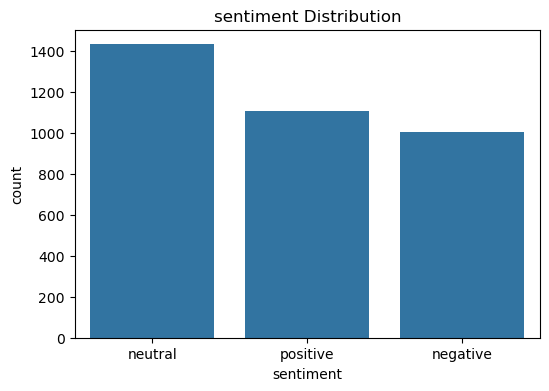

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment",data=df)
plt.title("sentiment Distribution")
plt.show()

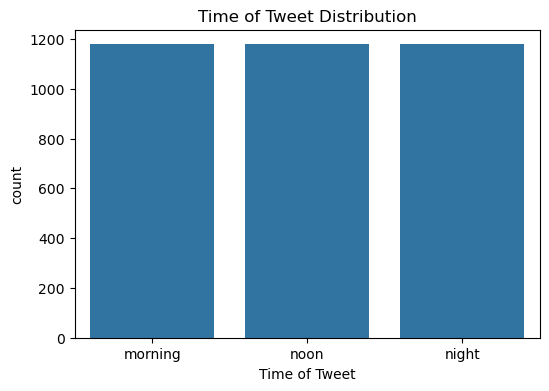

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="Time of Tweet", data=df)
plt.title("Time of Tweet Distribution")
plt.show()

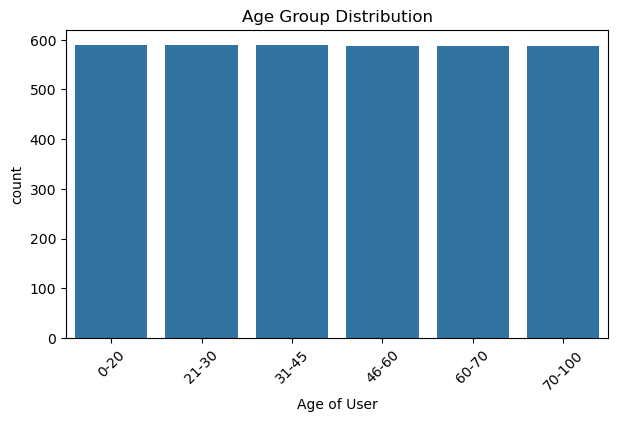

In [26]:
plt.figure(figsize=(7,4))
sns.countplot(x="Age of User", data=df)
plt.title("Age Group Distribution")
plt.xticks(rotation=45)
plt.show()

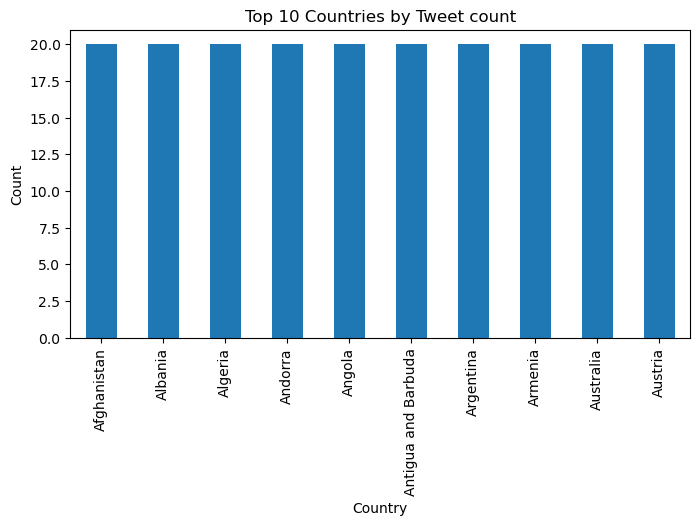

In [27]:
top_countries =df["Country"].value_counts().head(10)

plt.figure(figsize=(8,4))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Tweet count")
plt.ylabel("Count")
plt.show()

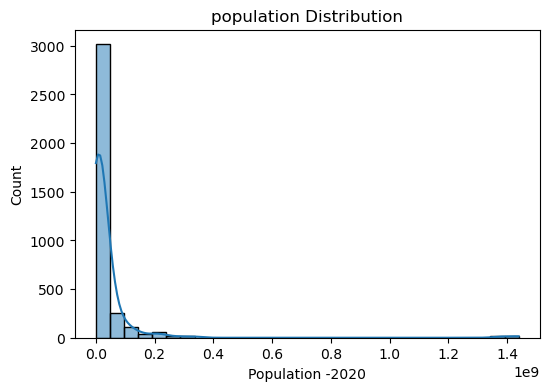

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df["Population -2020"], bins = 30, kde=True)
plt.title("population Distribution")
plt.show()

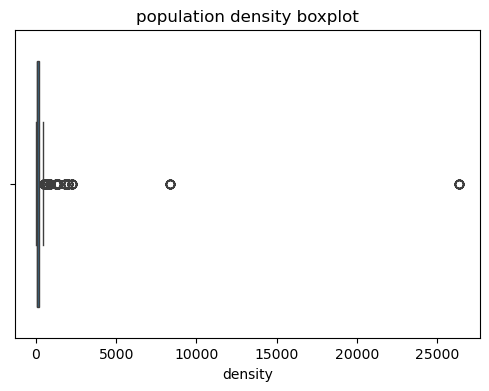

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["density"])
plt.title("population density boxplot")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
df.shape

(4815, 10)

In [38]:
df['text'].isnull().sum()

np.int64(1281)

In [43]:
df = df.dropna(subset=["text"])
df["text"] = df["text"].astype(str)

C:\Users\mbalu\AppData\Local\Temp\ipykernel_11024\3627654210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].astype(str)


In [44]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\s+","", text)
    text = re.sub(r"[^a-z\s]","",text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["clean_text"] = df["text"].apply(clean_text)

C:\Users\mbalu\AppData\Local\Temp\ipykernel_11024\4214903215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["text"].apply(clean_text)


In [46]:
df['text'].isnull().sum()

np.int64(0)

In [47]:
df["text"]

0       Last session of the day  http://twitpic.com/67ezh
1        Shanghai is also really exciting (precisely -...
2       Recession hit Veronique Branquinho, she has to...
3                                             happy bday!
4                  http://twitpic.com/4w75p - I like it!!
                              ...                        
3529    its at 3 am, im very tired but i can`t sleep  ...
3530    All alone in this old house again.  Thanks for...
3531     I know what you mean. My little dog is sinkin...
3532    _sutra what is your next youtube video gonna b...
3533     http://twitpic.com/4woj2 - omgssh  ang cute n...
Name: text, Length: 3534, dtype: object

In [48]:
df['sentiment'].isnull().sum()

np.int64(0)

In [49]:
df.shape

(3534, 11)

In [50]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),density,clean_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,60.0,last session of the day httptwitpiccomezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,105.0,shanghai is also really exciting precisely sky...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,18.0,recession hit veronique branquinho she has to ...
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,26.0,httptwitpiccomwp i like it


In [51]:
df.loc[:,"clean_text"] = df["text"].astype(str).apply(clean_text)
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),density,clean_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,60.0,last session of the day httptwitpiccomezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,105.0,shanghai is also really exciting precisely sky...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,18.0,recession hit veronique branquinho she has to ...
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,26.0,httptwitpiccomwp i like it


In [52]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()
df.loc[:,"sentiment_label"] = le.fit_transform(df["sentiment"])

In [57]:
le = LabelEncoder()
df.loc[:,"sentiment_label"] = le.fit_transform(df["sentiment"])

label_mapping= dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


In [58]:
{'negative': 0, 'neutral': 1, 'positive': 2}


{'negative': 0, 'neutral': 1, 'positive': 2}

In [60]:

from sklearn.model_selection import train_test_split

In [61]:
x = df["clean_text"]
y = df["sentiment_label"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [62]:
tfidf= TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words="english"
)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
y_pred = model.predict(x_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("n\Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.6435643564356436
n\Classification Report:

              precision    recall  f1-score   support

    negative       0.71      0.51      0.59       200
     neutral       0.57      0.74      0.64       286
    positive       0.74      0.64      0.69       221

    accuracy                           0.64       707
   macro avg       0.67      0.63      0.64       707
weighted avg       0.66      0.64      0.64       707



In [68]:
cm

array([[101,  90,   9],
       [ 34, 212,  40],
       [  7,  72, 142]])

<function matplotlib.pyplot.show(close=None, block=None)>

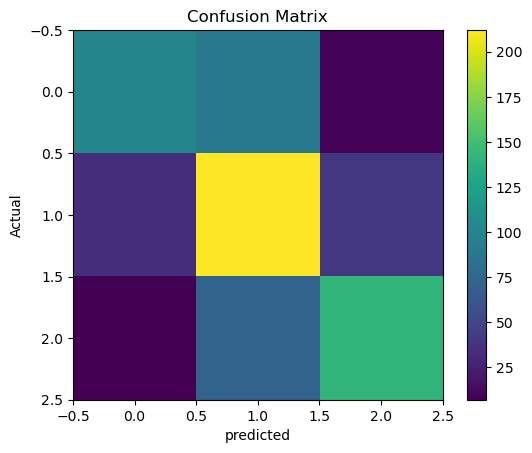

In [67]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show    

In [ ]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)
    return le.inverse_transform(prediction)[0]

predict_sentiment("I really hate this product!")

'negative'